In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
RELATIVE_FILE_PATH = r"src/analyse/"


In [3]:
def read_logs(relative_file_path, log_name):

    logs_list = []
    file_path = relative_file_path + r"\\"+ log_name
    print(file_path)
    
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:  
                logs_list.append(line)
    return logs_list

In [4]:
relative_file_path = r'C:\Users\Tristan\studium\helios-base\src\analyse'
logs_same_bases = read_logs(relative_file_path, "logs_same_bases")
logs_offensive_v3 = read_logs(relative_file_path, "logs_offensive_v3")
logs_offensive_v7 = read_logs(relative_file_path, "logs_offensive_v7")
logs_offensive_v8 = read_logs(relative_file_path, "logs_offensive_v8")
logs_rollen_v10 = read_logs(relative_file_path, "logs_rollen")
print(logs_same_bases)
print(logs_offensive_v3)
print(logs_offensive_v7)
print(logs_offensive_v8)
print(logs_rollen_v10)

helios_base_v2_numbers_X = []
helios_base_numbers_X = []


C:\Users\Tristan\studium\helios-base\src\analyse\\logs_same_bases
C:\Users\Tristan\studium\helios-base\src\analyse\\logs_offensive_v3
C:\Users\Tristan\studium\helios-base\src\analyse\\logs_offensive_v7
C:\Users\Tristan\studium\helios-base\src\analyse\\logs_offensive_v8
C:\Users\Tristan\studium\helios-base\src\analyse\\logs_rollen
['20250119184731-HELIOS_base_v2_4-vs-HELIOS_base_1.rcg', '20250119184731-HELIOS_base_v2_4-vs-HELIOS_base_1.rcl', '20250119190232-HELIOS_base_v2_4-vs-HELIOS_base_0.rcg', '20250119190232-HELIOS_base_v2_4-vs-HELIOS_base_0.rcl', '20250119210024-HELIOS_base_3-vs-HELIOS_base_v2_0.rcg', '20250119210024-HELIOS_base_3-vs-HELIOS_base_v2_0.rcl', '20250119211349-HELIOS_base_v2_6-vs-HELIOS_base_1.rcg', '20250119211349-HELIOS_base_v2_6-vs-HELIOS_base_1.rcl', '20250119212659-HELIOS_base_2-vs-HELIOS_base_v2_3.rcg', '20250119212659-HELIOS_base_2-vs-HELIOS_base_v2_3.rcl', '20250119220011-HELIOS_base_v2_3-vs-HELIOS_base_5.rcg', '20250119220011-HELIOS_base_v2_3-vs-HELIOS_base_5.r

In [5]:
# Funktion Ergebnisse extraheiren

def extract_results(machtes, name_tema_1, name_team_2):
    results_team_1 = []
    results_team_2 = []
    for game in machtes:
        match_v2 = re.search(name_tema_1 + r'_(\d+)', game)
        match_base = re.search(name_team_2 +r'_(\d+)', game)
        
        if match_v2:
            results_team_1.append(int(match_v2.group(1)))
        if match_base:
            results_team_2.append(int(match_base.group(1)))

    return results_team_1, results_team_2

def extract_goals(result_list):
    number_of_goals = 0
    mean_value = np.mean(result_list)
    for i in range(0, len(result_list)):
        number_of_goals += result_list[i]
    print(f"Anzahl der Spiele {len(result_list)}, Anzahl der Tore {number_of_goals}, Mittelwert der Tore {mean_value}")
    return number_of_goals, len(result_list)

def calculate_winners(data_team_1, name_team_1,  data_team_2, name_team_2):
    number_of_wins_team_1 = 0
    number_of_wins_team_2 = 0
    number_of_draws = 0
    for i in range(0, len(data_team_1)):
        if data_team_1[i] > data_team_2[i]:
            number_of_wins_team_1 += 1
        elif data_team_1[i] < data_team_2[i]:
            number_of_wins_team_2 += 1
        else:
            number_of_draws += 1
    print(f"Anzahl der Siege {name_team_1} : {number_of_wins_team_1}, Anzahl der Siege {name_team_2} : {number_of_wins_team_2}, Anzahl der Unentschieden {number_of_draws}")
    return number_of_wins_team_1, number_of_wins_team_2, number_of_draws

def remove_every_second_number(numbers):
    filtered_numbers = [num for i, num in enumerate(numbers) if (i + 1) % 2 != 0]
    return filtered_numbers

def printGraph(data_team_1, name_team_1, data_team_2, name_team_2):
    x_v2 = np.arange(len(data_team_1))
    x_base = np.arange(len(data_team_2))

    # team 1
    slope_v2, intercept_v2 = np.polyfit(x_v2, data_team_1, 1)
    regression_line_v2 = slope_v2 * x_v2 + intercept_v2

    #team 2
    slope_base, intercept_base = np.polyfit(x_base, data_team_2, 1)
    regression_line_base = slope_base * x_base + intercept_base

    # Plot the numbers and regression lines
    plt.figure(figsize=(10, 5))

    # Graphs
    plt.plot(x_v2, data_team_1, label= name_team_1, marker='o')
    plt.plot(x_base, data_team_2, label= name_team_2, marker='x')
    
    # Regression 
    plt.plot(x_v2, regression_line_v2, label= name_team_1+ ' Regression Line', linestyle='--')
    plt.plot(x_base, regression_line_base, label= name_team_2 + ' Regression Line', linestyle='--')

    # Mean 
    # mean_v2 = np.mean(data_team_1)
    # plt.axhline(y=mean_v2, color='r', linestyle='-', label= name_team_1 + ' Mean')
    # mean_base = np.mean(data_team_2)
    # plt.axhline(y=mean_base, color='g', linestyle='-', label= name_team_2 + ' Mean')

    plt.xlabel('Game Index')
    plt.ylabel('Goals')
    #plt.title(data_team_2 + " and " +  name_team_2 + " Numbers with Regression Lines")
    plt.legend()
    plt.grid(True)

    plt.show()

def calculate_percentage_difference(number1, number2):
    if number1 == 0 and number2 == 0:
        return 0
    average = (number1 + number2) / 2
    difference = abs(number1 - number2)
    percentage_difference = (difference / average) * 100
    return percentage_difference

Anzahl der Spiele 30, Anzahl der Tore 78, Mittelwert der Tore 2.6
Anzahl der Spiele 30, Anzahl der Tore 76, Mittelwert der Tore 2.533333333333333
Prozentuale Differenz der Tore: 2.5974025974025974 %
Anzahl der Siege base_1 : 15, Anzahl der Siege base_2 : 14, Anzahl der Unentschieden 1


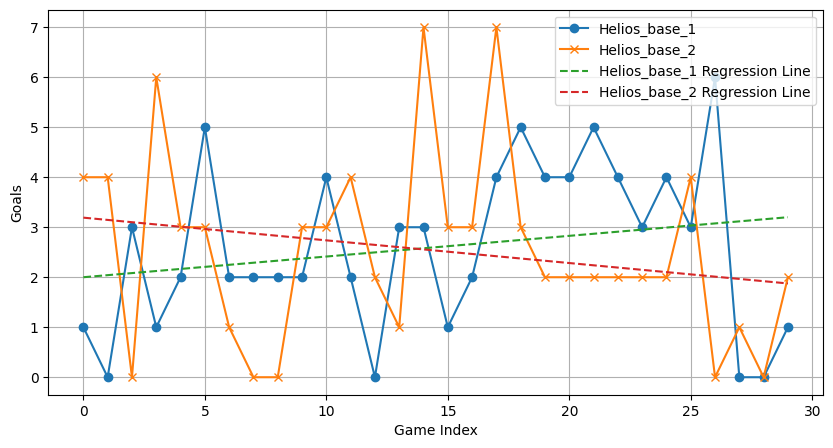

In [6]:
# base vs base
base_1= [1,0,3,1,2,5,2,2,2,2,4,2,0,3,3,1,2,4,5,4,4,5,4,3,4,3,6,0,0,1]
number_of_goals_1, count_games_1 =extract_goals(base_1)
base_2= [4,4,0,6,3,3,1,0,0,3,3,4,2,1,7,3,3,7,3,2,2,2,2,2,2,4,0,1,0,2]
number_of_goals_2, count_games_2 = extract_goals(base_2)

print(f"Prozentuale Differenz der Tore: {calculate_percentage_difference(number_of_goals_1, number_of_goals_2)} %")
calculate_winners(base_1, "base_1", base_2, "base_2")
printGraph(base_1, "Helios_base_1", base_2, "Helios_base_2")

Anzahl der Spiele 22, Anzahl der Tore 55, Mittelwert der Tore 2.5
Anzahl der Spiele 22, Anzahl der Tore 64, Mittelwert der Tore 2.909090909090909
Prozentuale Differenz der Tore: 15.126050420168067 %
Anzahl der Siege HELIOS_base_v2 : 10, Anzahl der Siege HELIOS_base : 11, Anzahl der Unentschieden 1


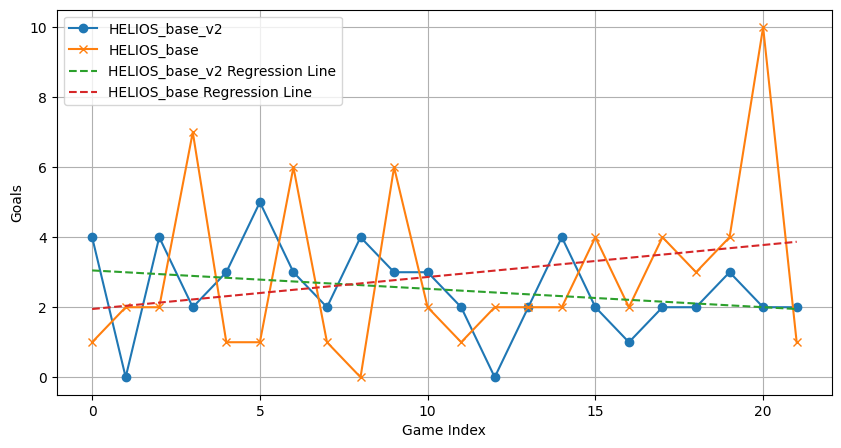

In [7]:
# v2 vs base
helios_base_v2 =[4,0,4,2,3,5,3,2,4,3,3,2,0,2,4,2,1,2,2,3,2,2]
helios_base =  [1,2,2,7,1,1,6,1,0,6,2,1,2,2,2,4,2,4,3,4,10,1]

number_of_goals_1, count_games_1= extract_goals(helios_base_v2)
number_of_goals_2, count_games_2 = extract_goals(helios_base)

print(f"Prozentuale Differenz der Tore: {calculate_percentage_difference(number_of_goals_1, number_of_goals_2)} %")

calculate_winners(data_team_1=helios_base_v2, name_team_1="HELIOS_base_v2", data_team_2=helios_base, name_team_2="HELIOS_base")
printGraph(data_team_1=helios_base_v2, name_team_1="HELIOS_base_v2", data_team_2=helios_base, name_team_2="HELIOS_base")

Anzahl der Spiele 30, Anzahl der Tore 93, Mittelwert der Tore 3.1
Anzahl der Spiele 30, Anzahl der Tore 66, Mittelwert der Tore 2.2
Prozentuale Differenz der Tore: 33.9622641509434 %
Anzahl der Siege HELIOS_base_v7 : 20, Anzahl der Siege HELIOS_base : 9, Anzahl der Unentschieden 1


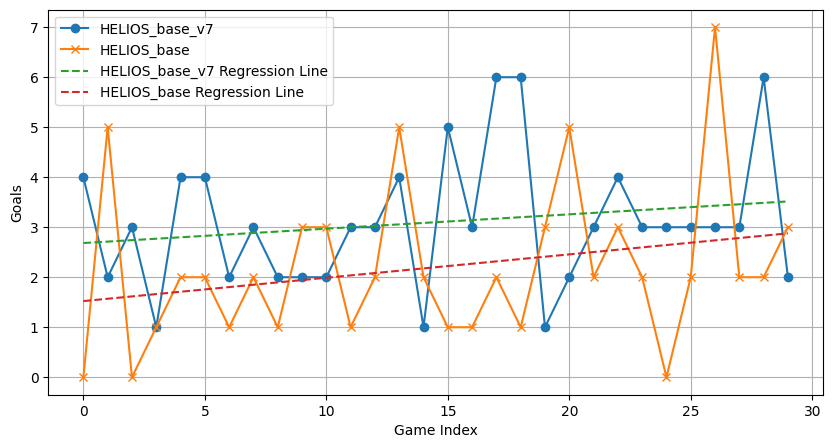

In [8]:
# v7 vs base

helios_base_v7 =[4,2,3,1,4,4,2,3,2,2,2,3,3,4,1,5,3,6,6,1,2,3,4,3,3,3,3,3,6,2]
number_of_goals_1, count_games_1 = extract_goals(helios_base_v7)

helios_base_1 = [0,5,0,1,2,2,1,2,1,3,3,1,2,5,2,1,1,2,1,3,5,2,3,2,0,2,7,2,2,3]
number_of_goals_2, count_games_2 = extract_goals(helios_base_1)


print(f"Prozentuale Differenz der Tore: {calculate_percentage_difference(number_of_goals_1, number_of_goals_2)} %")

calculate_winners(data_team_1=helios_base_v7, name_team_1="HELIOS_base_v7", data_team_2=helios_base_1, name_team_2="HELIOS_base")
printGraph(data_team_1=helios_base_v7, name_team_1="HELIOS_base_v7", data_team_2=helios_base_1, name_team_2="HELIOS_base")

Anzahl der Spiele 30, Anzahl der Tore 74, Mittelwert der Tore 2.466666666666667
Anzahl der Spiele 30, Anzahl der Tore 99, Mittelwert der Tore 3.3
Prozentuale Differenz der Tore: 28.901734104046245 %
Anzahl der Siege HELIOS_base : 10, Anzahl der Siege HELIOS_base_v8 : 19, Anzahl der Unentschieden 1


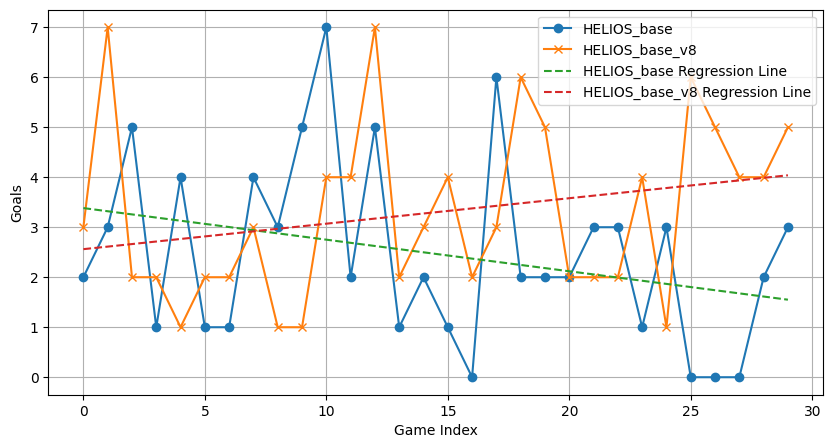

In [9]:
# v8 off vs base
numbers_v8, numbers_base = extract_results(logs_offensive_v8, "HELIOS_base", "HELIOS_base_v8")
numbers_v8 = remove_every_second_number(numbers_v8)
numbers_base = remove_every_second_number(numbers_base)

number_of_goals_1, count_games_1  = extract_goals(numbers_v8)
number_of_goals_2, count_games_2  = extract_goals(numbers_base)



print(f"Prozentuale Differenz der Tore: {calculate_percentage_difference(number_of_goals_1, number_of_goals_2)} %")
calculate_winners(data_team_1=numbers_v8, name_team_1= "HELIOS_base",  data_team_2=numbers_base, name_team_2="HELIOS_base_v8")
printGraph(data_team_1=numbers_v8, name_team_1= "HELIOS_base",  data_team_2=numbers_base, name_team_2="HELIOS_base_v8")

Anzahl der Spiele 25, Anzahl der Tore 91, Mittelwert der Tore 3.64
Anzahl der Spiele 25, Anzahl der Tore 82, Mittelwert der Tore 3.28
Prozentuale Differenz der Tore: 10.404624277456648 %
Anzahl der Siege HELIOS_base : 12, Anzahl der Siege HELIOS_base_v10 : 11, Anzahl der Unentschieden 2


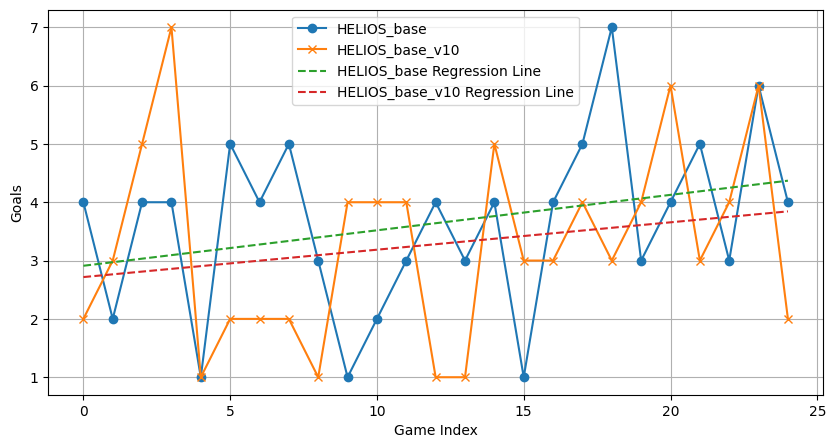

In [10]:
# v10(Rollen geändert) off vs base
numbers_v10, numbers_base = extract_results(logs_rollen_v10, "HELIOS_base", "HELIOS_base_v10")
numbers_v10 = remove_every_second_number(numbers_v10)
numbers_base = remove_every_second_number(numbers_base)

number_of_goals_1, count_games_1  = extract_goals(numbers_v10)
number_of_goals_2, count_games_2  = extract_goals(numbers_base)



print(f"Prozentuale Differenz der Tore: {calculate_percentage_difference(number_of_goals_1, number_of_goals_2)} %")
calculate_winners(data_team_1=numbers_v10, name_team_1= "HELIOS_base",  data_team_2=numbers_base, name_team_2="HELIOS_base_v10")
printGraph(data_team_1=numbers_v10, name_team_1= "HELIOS_base",  data_team_2=numbers_base, name_team_2="HELIOS_base_v10")